In [29]:
%pwd

'C:\\Users\\home\\dataitgirls\\open-data-park'

In [30]:
ls

 C 드라이브의 볼륨: S3A4924D002
 볼륨 일련 번호: 62EA-1054

 C:\Users\home\dataitgirls\open-data-park 디렉터리

2018-08-10  오후 12:32    <DIR>          .
2018-08-10  오후 12:32    <DIR>          ..
2018-08-10  오후 12:11                46 .gitignore
2018-08-10  오후 12:13    <DIR>          .ipynb_checkpoints
2018-08-10  오후 12:09    <DIR>          data
2018-08-10  오후 12:08             1,090 LICENSE
2018-08-10  오후 12:32           116,083 park.ipynb
2018-08-10  오후 12:08                63 README.md
               4개 파일             117,282 바이트
               4개 디렉터리  220,362,633,216 바이트 남음


In [31]:
ls data

 C 드라이브의 볼륨: S3A4924D002
 볼륨 일련 번호: 62EA-1054

 C:\Users\home\dataitgirls\open-data-park\data 디렉터리

2018-08-10  오후 12:09    <DIR>          .
2018-08-10  오후 12:09    <DIR>          ..
2018-08-10  오전 11:50         2,422,465 park.csv
               1개 파일           2,422,465 바이트
               2개 디렉터리  220,362,616,832 바이트 남음


In [32]:
import pandas as pd

In [33]:
df_park = pd.read_csv('data/park.csv', encoding='euc-kr')
df_park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,Unnamed: 17
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,NaN,NaN,NaN,NaN,NaN,1995-12-27,강원도 양구군청,033-480-2927,2018-02-28,NaN
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,NaN,NaN,NaN,NaN,NaN,2010-03-19,강원도 양구군청,033-480-2460,2018-02-28,NaN
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,NaN,NaN,NaN,NaN,NaN,2010-10-01,강원도 양구군청,033-480-2576,2018-02-28,NaN


In [34]:
df_park['소재지도로명주소'].fillna(df_park['소재지지번주소'], inplace = True)

In [35]:
df_park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', 'Unnamed: 17'],
      dtype='object')

In [28]:
df_park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 17'], inplace=True)

KeyError: "labels ['공원보유시설(운동시설)' '공원보유시설(유희시설)' '공원보유시설(편익시설)' '공원보유시설(교양시설)'\n '공원보유시설(기타시설)' '지정고시일' '관리기관명' 'Unnamed: 17'] not contained in axis"

In [36]:
df_park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', 'Unnamed: 17'],
      dtype='object')

In [37]:
df_park['시도'] = df_park['소재지도로명주소'].str.split(' ', expand=True)[0]
df_park['구군'] = df_park['소재지도로명주소'].str.split(' ', expand=True)[1]

In [38]:
df_park['공원면적'] = df_park['공원면적'].astype(str)
df_park['공원면적'] = df_park['공원면적'].str.replace(',', '').astype(float)

df_park['공원면적그래프용'] = df_park['공원면적'].apply(lambda x : x * 0.0001)
df_park['공원면적그래프용'].head()

0     0.1597
1     0.1498
2     0.1499
3     1.8437
4    17.8931
Name: 공원면적그래프용, dtype: float64

In [39]:
from plotnine import *

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\home\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


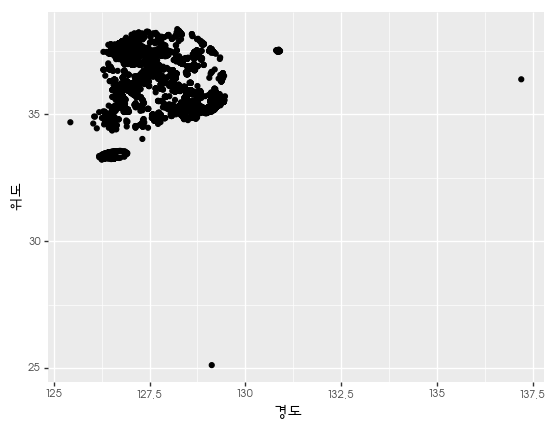

<ggplot: (-9223372036838896303)>

In [40]:
(ggplot(df_park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='HYnamM'))
)

In [41]:
# data 중 outlier와 결측치가 있는 것은 제외한다.

df_park = df_park.loc[(df_park['위도'] > 32 ) 
            & (df_park['경도'] < 132) 
            & df_park['시도'].notnull()]
df_park.shape

(13127, 21)

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


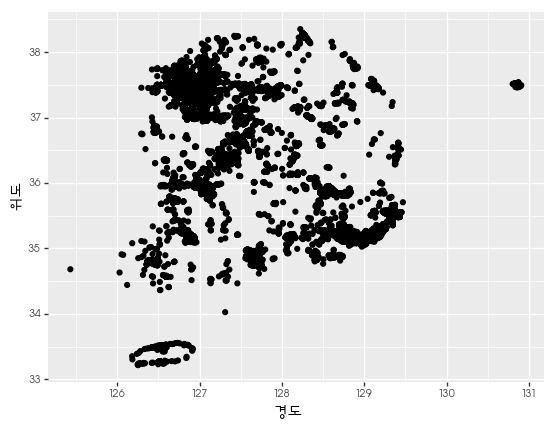

<ggplot: (-9223372036839544369)>

In [42]:
# 다시 그려보면 정제되어 있는 것을 확인할 수 있다.
(ggplot(df_park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='HYnamM'))
)

In [43]:
df_park['시도'].unique()

array(['강원도', '대구광역시', '울산광역시', '광주광역시', '전라북도', '부산광역시', '대전광역시',
       '제주특별자치도', '경기도', '충청남도', '서울특별시', '충청북도', '경상남도', '전라남도',
       '세종특별자치시', '인천광역시', '경상북도'], dtype=object)

In [46]:
df_park['시도']

<bound method IndexOpsMixin.value_counts of 0          강원도
1          강원도
2          강원도
3          강원도
4          강원도
5          강원도
6        대구광역시
7        대구광역시
8        대구광역시
9        대구광역시
10       대구광역시
11       대구광역시
12       대구광역시
13       대구광역시
14       대구광역시
15       대구광역시
16       대구광역시
17       대구광역시
18       대구광역시
19       대구광역시
20       대구광역시
21       대구광역시
22       대구광역시
23       대구광역시
24       대구광역시
25       대구광역시
26       대구광역시
27       대구광역시
28       대구광역시
29       대구광역시
         ...  
13105     경상남도
13106     경상남도
13107     경상남도
13108     경상남도
13109     경상남도
13110     경상남도
13111     경상남도
13112     경상남도
13113     경상남도
13114     경상남도
13115     경상남도
13116     경상남도
13117     경상남도
13118     경상남도
13119     경상남도
13120     경상남도
13121     경상남도
13122     경상남도
13123     경상남도
13124     경상남도
13125     경상남도
13126     경상남도
13127     경상남도
13128     경상남도
13129     경상남도
13130     경상남도
13131     경상남도
13132     경상남도
13133     충청남도
13134     충청남도
Name: 시도, Length: 13127, dtype: object>

In [48]:
df_seoul = df_park.loc[df_park['시도'].str.startswith('서울')].copy()
df_seoul.shape

(1226, 21)

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


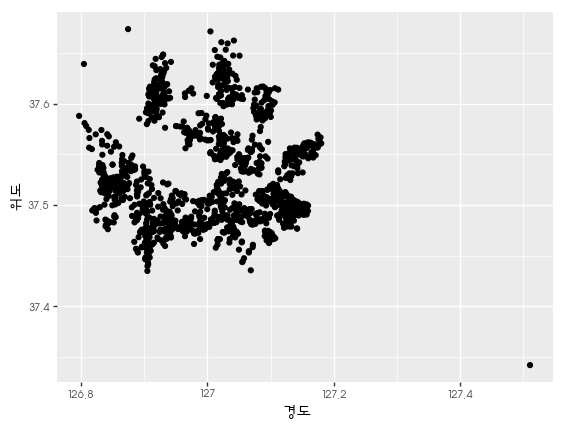

<ggplot: (-9223372036839497212)>

In [49]:
(ggplot(df_seoul)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='HYnamM'))
)

In [51]:
# 멀리 떨어져 있는 점 제거하기

df_seoul = df_seoul.loc[(df_park['위도'] > 37.4 ) 
            & (df_park['경도'] < 127.4 )]
df_seoul.shape

(1225, 21)

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


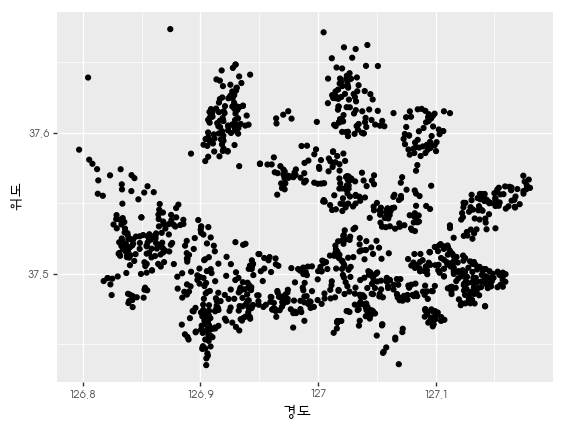

<ggplot: (-9223372036839348571)>

In [52]:
(ggplot(df_seoul)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='HYnamM'))
)